# 20200907 - ribosome density distributions of SMG1i, GIGYF2, EIF4E2, NMD targets

First I need to assemble the data from xtail (fold changes and p values)

In [1]:
#set up imports, define some functions
import pandas as pd
import numpy as np
import math
import sys
pipeline_dir = '../ribo_seq/'
if pipeline_dir not in sys.path:
    sys.path.append(pipeline_dir)
import ribo_utils
comprehensive_gtf_data = ribo_utils.gtf_data('../annotations/gencode.v35.annotation.pBZ105.no_nonstop.gtf', add_3_for_stop=True)
genome_seq = ribo_utils.genome_sequence('../annotations/genome/GRCh38.primary_assembly.genome.pBZ105.fa')
def extract_gene_id(x):
    info_parts = x.split('|')
    return info_parts[0]

def extract_gene_name(x):
    info_parts = x.split('|')
    return info_parts[1]

def get_gene_id(x):
    if '|' in x:
        return get_gene_id(x.split('|')[0])
    return comprehensive_gtf_data.tx_to_genes[x]

def get_gene_name(x):
    if '|' in x:
        return get_gene_name(x.split('|')[0])
    return comprehensive_gtf_data.tx_to_gene_names[x]

def log_trans(x):
    try:
        return math.log(x, 2)
    except:
        return float('NaN')

def get_stop_codon(x, upstream=0, downstream=0):
    transcript_seq = comprehensive_gtf_data.transcript_sequence(genome_seq, x, exon_type='exon')
    cds_start, cds_end = comprehensive_gtf_data.cds_boundaries(x)
    stop_seq = transcript_seq[cds_end-(2+upstream): cds_end+1+downstream] #have to point 1 past end positions
    return stop_seq

In [2]:
#matplotlib setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from adjustText import adjust_text
import math

mpl.rcParams['pdf.fonttype'] = 42 #leaves most text as actual text in PDFs, not outlines
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

black = (0,0,0)
gray = (0.5,0.5,0.5)
orange = (230/255.0,159/255.0,0)
skyBlue = (86/255.0,180/255.0,233/255.0)
bluishGreen = (0,158/255.0,115/255.0)
yellow = (240/255.0,228/255.0,66/255.0)
blue = (0,114/255.0,178/255.0)
vermillion = (213/255.0,94/255.0,0)
reddishPurple = (204/255.0,121/255.0,167/255.0)
colors = [black, orange, skyBlue, bluishGreen, vermillion, blue, reddishPurple, yellow]
rainbow = [black, vermillion, orange, bluishGreen, blue, reddishPurple, 'violet']

In [3]:
#get data from xtail analysis
#KO effects in DMSO
SMG1i_vs_DMSO = pd.read_csv('../5_run_xtail/xtail_results/xtail_SMG1i_mono_RNA.tsv', sep='\t')
EIF4E2_in_DMSO = pd.read_csv('../5_run_xtail/xtail_results/xtail_eIF4E2_in_DMSO_mono_RNA.tsv', sep='\t')
GIGYF2_in_DMSO = pd.read_csv('../5_run_xtail/xtail_results/xtail_GIGYF2_in_DMSO_mono_RNA.tsv', sep='\t')

significance_datasets = [SMG1i_vs_DMSO, EIF4E2_in_DMSO, GIGYF2_in_DMSO]
for dataset in significance_datasets:
    dataset.rename(columns={'Unnamed: 0': 'tx_id'}, inplace=True)
    dataset['gene_name'] = dataset['tx_id'].apply(get_gene_name)
    #dataset['minus logpadj'] = dataset['pvalue.adjust'].apply(log_trans)*-1

In [4]:
SMG1i_vs_DMSO

,tx_id,mRNA_log2FC,RPF_log2FC,log2FC_TE_v1,pvalue_v1,WT_DMSO_log2TE,WT_SMG1i_log2TE,log2FC_TE_v2,pvalue_v2,log2FC_TE_final,pvalue_final,pvalue.adjust,gene_name
0,ENST00000253047.7,-0.303171,-0.357888,-0.063738,8.489703e-01,2.420689,2.365973,-0.056443,8.457135e-01,-0.063738,8.489703e-01,9.876741e-01,TMEM160
1,ENST00000270538.8,0.120366,0.056345,-0.064531,4.963280e-01,-0.028307,-0.092328,-0.064197,5.260011e-01,-0.064197,5.260011e-01,9.090256e-01,TIMM44
2,ENST00000395047.6,-0.316227,-0.197701,0.118075,1.004105e-01,0.622503,0.741029,0.118457,4.800001e-02,0.118075,1.004105e-01,5.035451e-01,VDAC1
3,ENST00000261438.10,-0.242642,-0.038970,0.202313,3.110959e-01,-1.198043,-0.994371,0.202873,4.154733e-01,0.202873,4.154733e-01,8.491053e-01,KLF3
4,ENST00000156084.8,-0.059904,0.060155,0.119211,2.852159e-01,-0.159417,-0.039359,0.119967,2.997712e-01,0.119967,2.997712e-01,7.752835e-01,OTUD5
5,ENST00000578681.5,0.811635,0.116549,-0.695402,3.676337e-13,-1.275432,-1.970518,-0.695226,1.257233e-09,-0.695226,1.257233e-09,1.590400e-07,DDX42
6,ENST00000382452.6,-0.105878,-0.087387,0.018129,7.770244e-01,-0.463230,-0.444739,0.018453,7.694542e-01,0.018129,7.770244e-01,9.754391e-01,WDR1
7,ENST00000638119.2,-0.124798,-0.114915,0.005768,9.993257e-01,1.997206,2.007089,0.009262,9.618143e-01,0.005768,9.993257e-01,9.999928e-01,KIFBP
8,ENST00000357988.9,-0.025440,1.455001,1.475034,1.907285e-01,-1.193105,0.287313,1.476326,6.872016e-01,1.476326,6.872016e-01,9.552812e-01,PHF8
9,ENST00000260600.9,0.122274,-0.052931,-0.178498,4.977118e-01,-0.681010,-0.856215,-0.176528,5.690066e-01,-0.176528,5.690066e-01,9.190328e-01,ADCY3


### import TPMs

In [5]:
all_tpms = pd.read_csv('../4_salmon_quant/all_datasets_stop_collapsed_tpm.tsv', sep='\t')

In [6]:
samples = ['WT_DMSO_1', 'WT_DMSO_2', 'WT_SMG1i_1', 'WT_SMG1i_2', 
                    'eIF4E2_4_DMSO_1', 'eIF4E2_4_DMSO_2', 'eIF4E2_4_SMG1i_1', 'eIF4E2_4_SMG1i_2',
                    'GIGYF2_4_DMSO_1', 'GIGYF2_4_DMSO_2', 'GIGYF2_4_SMG1i_1', 'GIGYF2_4_SMG1i_2']
#average replicates
for i in range(0, len(samples), 2):
    rep1 = samples[i]
    rep2 = samples[i+1]
    name = rep1[:-2]
    all_tpms['%s_mono/RNA' % (name)] = (all_tpms['%s_mono' % (rep1)]/all_tpms['%s_RNA' % (rep1)] +  all_tpms['%s_mono' % (rep2)]/all_tpms['%s_RNA' % (rep2)])/2.
    all_tpms['%s_mono/RNA' % (name)]=all_tpms['%s_mono/RNA' % (name)].apply(log_trans)

In [7]:
#import NMD targets
colombo_p_values = pd.read_csv('../3_call_NMD_targets/colombo_NMD_meta_pvalues.tsv', sep = '\t')
colombo_p_values.sort_values(by=['meta_meta'], inplace=True)

## Plot densities

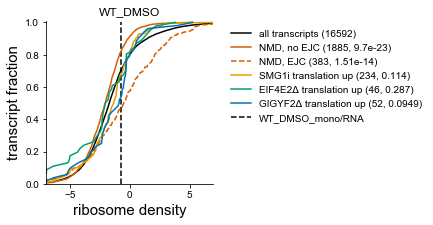

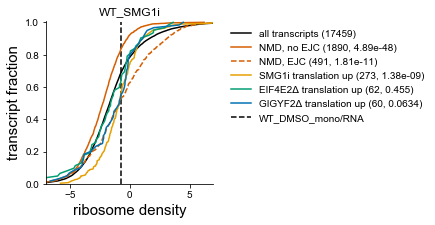

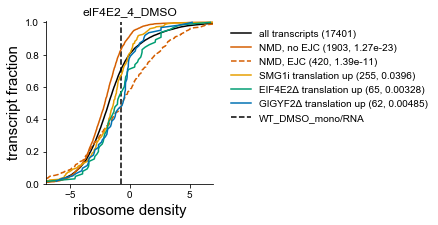

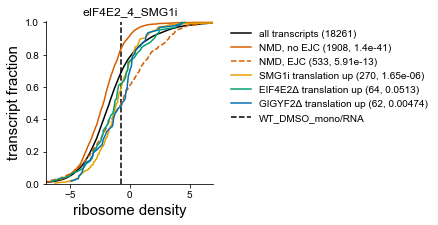

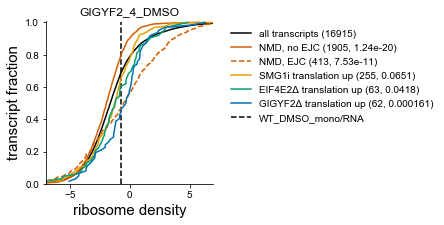

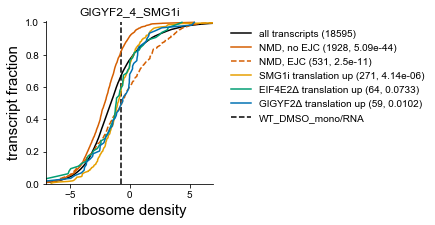

In [14]:
samples = ['WT_DMSO_1', 'WT_DMSO_2', 'WT_SMG1i_1', 'WT_SMG1i_2', 
                    'eIF4E2_4_DMSO_1', 'eIF4E2_4_DMSO_2', 'eIF4E2_4_SMG1i_1', 'eIF4E2_4_SMG1i_2',
                    'GIGYF2_4_DMSO_1', 'GIGYF2_4_DMSO_2', 'GIGYF2_4_SMG1i_1', 'GIGYF2_4_SMG1i_2']
#average replicates
for i in range(0, len(samples), 2):
    rep1 = samples[i]
    rep2 = samples[i+1]
    name = rep1[:-2]

    #plot_colors = [gray, bluishGreen, blue, reddishPurple, vermillion]
    plot_colors = colors

    plot_index = 1
    num_plots_wide = 1
    num_plots_high = 1
    fig = plt.figure(figsize=(3*num_plots_wide, 3*num_plots_high))
    plot = fig.add_subplot(num_plots_high, num_plots_wide, plot_index)

    all_TEs =  all_tpms['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()
    plot.plot(sorted(all_TEs), np.arange(1./len(all_TEs), 1+1./len(all_TEs), 1./len(all_TEs)), label='all transcripts (%d)' %(len(all_TEs)), color = black)

    NMD_targets = colombo_p_values[colombo_p_values['meta_meta']<0.05]
    NMD_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (colombo_p_values['GENCODE nmd annotation'])]
    NMD_no_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (~colombo_p_values['GENCODE nmd annotation'])]
    
    reporter_TE = all_tpms[all_tpms['tx_id']=='UGAC_reporter']['WT_DMSO_mono/RNA'].replace([np.inf, -np.inf], np.nan).dropna()

    NMD_no_EJC_TEs = all_tpms[all_tpms['tx_id'].isin(NMD_no_EJC_targets['tx_id'])]['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()
    NMD_EJC_TEs = all_tpms[all_tpms['tx_id'].isin(NMD_EJC_targets['tx_id'])]['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()

    u, p = stats.mannwhitneyu(all_TEs, NMD_no_EJC_TEs)
    plot.plot(sorted(NMD_no_EJC_TEs), np.arange(1./len(NMD_no_EJC_TEs), 1+1./len(NMD_no_EJC_TEs), 1./len(NMD_no_EJC_TEs)), label='NMD, no EJC (%d, %.3g)'%(len(NMD_no_EJC_TEs), p), color = vermillion)
    u, p = stats.mannwhitneyu(all_TEs, NMD_EJC_TEs)         
    plot.plot(sorted(NMD_EJC_TEs), np.arange(1./len(NMD_EJC_TEs), 1+1./len(NMD_EJC_TEs), 1./len(NMD_EJC_TEs)), label='NMD, EJC (%d, %.3g)'%(len(NMD_EJC_TEs), p), color = vermillion, linestyle='dashed')

    SMG1i_hits = SMG1i_vs_DMSO[(SMG1i_vs_DMSO['pvalue.adjust']<0.1) & (SMG1i_vs_DMSO['log2FC_TE_final']>0)]
    GIGYF2_hits = GIGYF2_in_DMSO[(GIGYF2_in_DMSO['pvalue.adjust']<0.1) & (GIGYF2_in_DMSO['log2FC_TE_final']>0)]
    EIF4E2_hits = EIF4E2_in_DMSO[(EIF4E2_in_DMSO['pvalue.adjust']<0.1) & (EIF4E2_in_DMSO['log2FC_TE_final']>0)]

    SMG1i_TEs = all_tpms[all_tpms['tx_id'].isin(SMG1i_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    GIGYF2_TEs = all_tpms[all_tpms['tx_id'].isin(GIGYF2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    EIF4E2_TEs = all_tpms[all_tpms['tx_id'].isin(EIF4E2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()

    u, p = stats.mannwhitneyu(all_TEs, SMG1i_TEs)         
    plot.plot(sorted(SMG1i_TEs), np.arange(1./len(SMG1i_TEs), 1+1./len(SMG1i_TEs), 1./len(SMG1i_TEs)), label='SMG1i translation up (%d, %.3g)'%(len(SMG1i_TEs), p), color = orange)

    u, p = stats.mannwhitneyu(all_TEs, EIF4E2_TEs)         
    plot.plot(sorted(EIF4E2_TEs), np.arange(1./len(EIF4E2_TEs), 1+1./len(EIF4E2_TEs), 1./len(EIF4E2_TEs)), label= u'EIF4E2Δ translation up (%d, %.3g)'%(len(EIF4E2_TEs), p), color = bluishGreen)

    u, p = stats.mannwhitneyu(all_TEs, GIGYF2_TEs)         
    plot.plot(sorted(GIGYF2_TEs), np.arange(1./len(GIGYF2_TEs), 1+1./len(GIGYF2_TEs), 1./len(GIGYF2_TEs)), label= u'GIGYF2Δ translation up (%d, %.3g)'%(len(GIGYF2_TEs), p), color = blue)

    plot.vlines(reporter_TE, 0,1, linestyle='dashed')

    plot.set_ylabel('transcript fraction', fontsize=15)
    plot.set_xlabel('ribosome density', fontsize=15)
    plot.set_title(name)
    plot.set_ylim(0, 1.01)
    plot.set_xlim(-7, 7)

    plot.spines['right'].set_visible(False)
    plot.spines['top'].set_visible(False)
    #plt.xticks(rotation=45, ha='right')
    lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    lg.draw_frame(False)
    #plt.subplots_adjust(wspace = 0.3)
    #plt.tight_layout()
    plt.savefig('ribosome_densities_subsets_%s.pdf' % name, transparent='True', format='pdf', bbox_inches='tight')

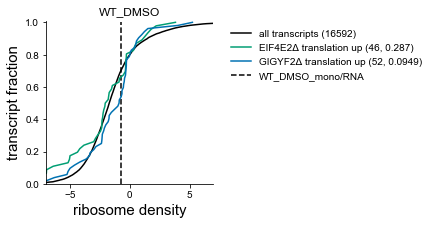

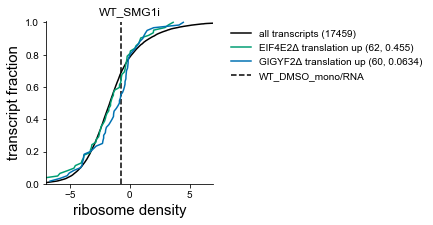

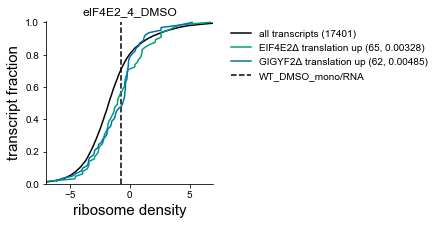

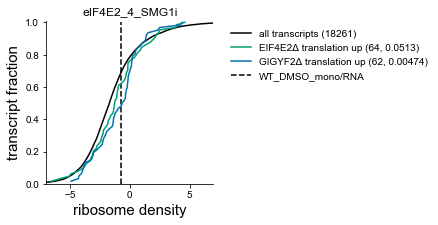

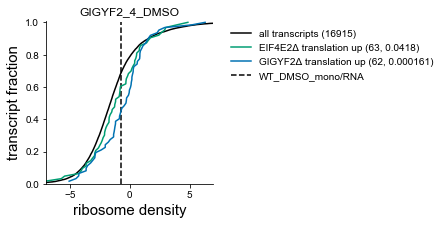

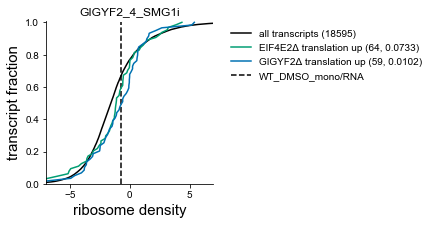

In [18]:
samples = ['WT_DMSO_1', 'WT_DMSO_2', 'WT_SMG1i_1', 'WT_SMG1i_2', 
                    'eIF4E2_4_DMSO_1', 'eIF4E2_4_DMSO_2', 'eIF4E2_4_SMG1i_1', 'eIF4E2_4_SMG1i_2',
                    'GIGYF2_4_DMSO_1', 'GIGYF2_4_DMSO_2', 'GIGYF2_4_SMG1i_1', 'GIGYF2_4_SMG1i_2']
#average replicates
for i in range(0, len(samples), 2):
    rep1 = samples[i]
    rep2 = samples[i+1]
    name = rep1[:-2]

    #plot_colors = [gray, bluishGreen, blue, reddishPurple, vermillion]
    plot_colors = colors

    plot_index = 1
    num_plots_wide = 1
    num_plots_high = 1
    fig = plt.figure(figsize=(3*num_plots_wide, 3*num_plots_high))
    plot = fig.add_subplot(num_plots_high, num_plots_wide, plot_index)

    all_TEs =  all_tpms['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()
    plot.plot(sorted(all_TEs), np.arange(1./len(all_TEs), 1+1./len(all_TEs), 1./len(all_TEs)), label='all transcripts (%d)' %(len(all_TEs)), color = black)

    NMD_targets = colombo_p_values[colombo_p_values['meta_meta']<0.05]
    NMD_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (colombo_p_values['GENCODE nmd annotation'])]
    NMD_no_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (~colombo_p_values['GENCODE nmd annotation'])]
    
    reporter_TE = all_tpms[all_tpms['tx_id']=='UGAC_reporter']['WT_DMSO_mono/RNA'].replace([np.inf, -np.inf], np.nan).dropna()

    SMG1i_hits = SMG1i_vs_DMSO[(SMG1i_vs_DMSO['pvalue.adjust']<0.1) & (SMG1i_vs_DMSO['log2FC_TE_final']>0)]
    GIGYF2_hits = GIGYF2_in_DMSO[(GIGYF2_in_DMSO['pvalue.adjust']<0.1) & (GIGYF2_in_DMSO['log2FC_TE_final']>0)]
    EIF4E2_hits = EIF4E2_in_DMSO[(EIF4E2_in_DMSO['pvalue.adjust']<0.1) & (EIF4E2_in_DMSO['log2FC_TE_final']>0)]

    SMG1i_TEs = all_tpms[all_tpms['tx_id'].isin(SMG1i_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    GIGYF2_TEs = all_tpms[all_tpms['tx_id'].isin(GIGYF2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    EIF4E2_TEs = all_tpms[all_tpms['tx_id'].isin(EIF4E2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()

    u, p = stats.mannwhitneyu(all_TEs, EIF4E2_TEs)         
    plot.plot(sorted(EIF4E2_TEs), np.arange(1./len(EIF4E2_TEs), 1+1./len(EIF4E2_TEs), 1./len(EIF4E2_TEs)), label= u'EIF4E2Δ translation up (%d, %.3g)'%(len(EIF4E2_TEs), p), color = bluishGreen)

    u, p = stats.mannwhitneyu(all_TEs, GIGYF2_TEs)         
    plot.plot(sorted(GIGYF2_TEs), np.arange(1./len(GIGYF2_TEs), 1+1./len(GIGYF2_TEs), 1./len(GIGYF2_TEs)), label= u'GIGYF2Δ translation up (%d, %.3g)'%(len(GIGYF2_TEs), p), color = blue)

    plot.vlines(reporter_TE, 0,1, linestyle='dashed')

    plot.set_ylabel('transcript fraction', fontsize=15)
    plot.set_xlabel('ribosome density', fontsize=15)
    plot.set_title(name)
    plot.set_ylim(0, 1.01)
    plot.set_xlim(-7, 7)

    plot.spines['right'].set_visible(False)
    plot.spines['top'].set_visible(False)
    #plt.xticks(rotation=45, ha='right')
    lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    lg.draw_frame(False)
    #plt.subplots_adjust(wspace = 0.3)
    #plt.tight_layout()
    plt.savefig('ribosome_densities_our_hits_%s.pdf' % name, transparent='True', format='pdf', bbox_inches='tight')

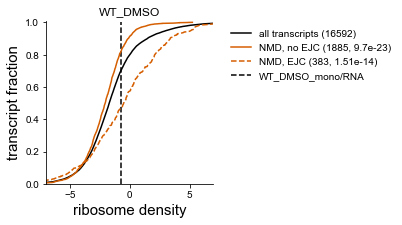

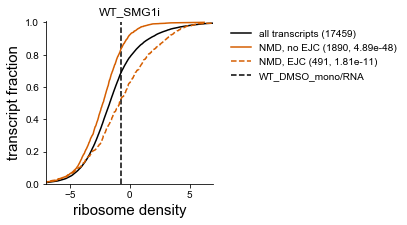

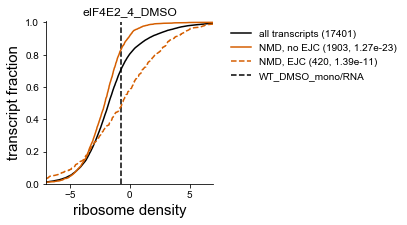

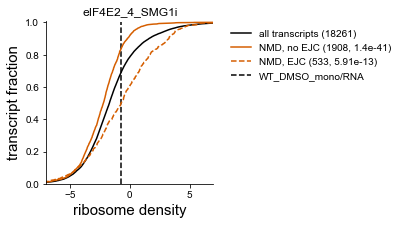

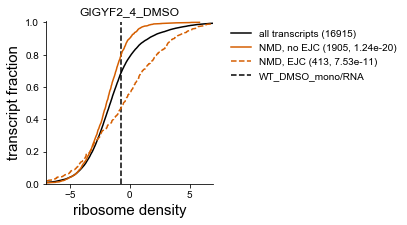

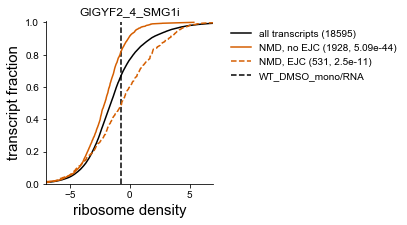

In [15]:
samples = ['WT_DMSO_1', 'WT_DMSO_2', 'WT_SMG1i_1', 'WT_SMG1i_2', 
                    'eIF4E2_4_DMSO_1', 'eIF4E2_4_DMSO_2', 'eIF4E2_4_SMG1i_1', 'eIF4E2_4_SMG1i_2',
                    'GIGYF2_4_DMSO_1', 'GIGYF2_4_DMSO_2', 'GIGYF2_4_SMG1i_1', 'GIGYF2_4_SMG1i_2']
#average replicates
for i in range(0, len(samples), 2):
    rep1 = samples[i]
    rep2 = samples[i+1]
    name = rep1[:-2]

    #plot_colors = [gray, bluishGreen, blue, reddishPurple, vermillion]
    plot_colors = colors

    plot_index = 1
    num_plots_wide = 1
    num_plots_high = 1
    fig = plt.figure(figsize=(3*num_plots_wide, 3*num_plots_high))
    plot = fig.add_subplot(num_plots_high, num_plots_wide, plot_index)

    all_TEs =  all_tpms['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()
    plot.plot(sorted(all_TEs), np.arange(1./len(all_TEs), 1+1./len(all_TEs), 1./len(all_TEs)), label='all transcripts (%d)' %(len(all_TEs)), color = black)

    NMD_targets = colombo_p_values[colombo_p_values['meta_meta']<0.05]
    NMD_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (colombo_p_values['GENCODE nmd annotation'])]
    NMD_no_EJC_targets = colombo_p_values[(colombo_p_values['meta_meta']<0.05) & (~colombo_p_values['GENCODE nmd annotation'])]
    
    reporter_TE = all_tpms[all_tpms['tx_id']=='UGAC_reporter']['WT_DMSO_mono/RNA'].replace([np.inf, -np.inf], np.nan).dropna()

    NMD_no_EJC_TEs = all_tpms[all_tpms['tx_id'].isin(NMD_no_EJC_targets['tx_id'])]['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()
    NMD_EJC_TEs = all_tpms[all_tpms['tx_id'].isin(NMD_EJC_targets['tx_id'])]['%s_mono/RNA' % name].replace([np.inf, -np.inf], np.nan).dropna()

    u, p = stats.mannwhitneyu(all_TEs, NMD_no_EJC_TEs)
    plot.plot(sorted(NMD_no_EJC_TEs), np.arange(1./len(NMD_no_EJC_TEs), 1+1./len(NMD_no_EJC_TEs), 1./len(NMD_no_EJC_TEs)), label='NMD, no EJC (%d, %.3g)'%(len(NMD_no_EJC_TEs), p), color = vermillion)
    u, p = stats.mannwhitneyu(all_TEs, NMD_EJC_TEs)         
    plot.plot(sorted(NMD_EJC_TEs), np.arange(1./len(NMD_EJC_TEs), 1+1./len(NMD_EJC_TEs), 1./len(NMD_EJC_TEs)), label='NMD, EJC (%d, %.3g)'%(len(NMD_EJC_TEs), p), color = vermillion, linestyle='dashed')

    SMG1i_hits = SMG1i_vs_DMSO[(SMG1i_vs_DMSO['pvalue.adjust']<0.1) & (SMG1i_vs_DMSO['log2FC_TE_final']>0)]
    GIGYF2_hits = GIGYF2_in_DMSO[(GIGYF2_in_DMSO['pvalue.adjust']<0.1) & (GIGYF2_in_DMSO['log2FC_TE_final']>0)]
    EIF4E2_hits = EIF4E2_in_DMSO[(EIF4E2_in_DMSO['pvalue.adjust']<0.1) & (EIF4E2_in_DMSO['log2FC_TE_final']>0)]

    SMG1i_TEs = all_tpms[all_tpms['tx_id'].isin(SMG1i_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    GIGYF2_TEs = all_tpms[all_tpms['tx_id'].isin(GIGYF2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()
    EIF4E2_TEs = all_tpms[all_tpms['tx_id'].isin(EIF4E2_hits['tx_id'])]['%s_mono/RNA' % (name)].replace([np.inf, -np.inf], np.nan).dropna()

    plot.vlines(reporter_TE, 0,1, linestyle='dashed')

    plot.set_ylabel('transcript fraction', fontsize=15)
    plot.set_xlabel('ribosome density', fontsize=15)
    plot.set_title(name)
    plot.set_ylim(0, 1.01)
    plot.set_xlim(-7, 7)

    plot.spines['right'].set_visible(False)
    plot.spines['top'].set_visible(False)
    #plt.xticks(rotation=45, ha='right')
    lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    lg.draw_frame(False)
    #plt.subplots_adjust(wspace = 0.3)
    #plt.tight_layout()
    plt.savefig('ribosome_densities_NMD_targets_%s.pdf' % name, transparent='True', format='pdf', bbox_inches='tight')